In [40]:
from torchvision import datasets, transforms

# MINIST数据集下载，转换成tensor已经自动归一化
trainDataset = datasets.MNIST(root="D:\学习资料\计算机\研一下\数据挖掘", transform=transforms.ToTensor(), train=True, download=True)
testDataset = datasets.MNIST(root="D:\学习资料\计算机\研一下\数据挖掘", transform=transforms.ToTensor(), train=False, download=True)

In [41]:
# 数据集划分比例
print("训练集:测试集")
print(str(len(trainDataset))+":"+str(len(testDataset)))

训练集:测试集
60000:10000


类别
5


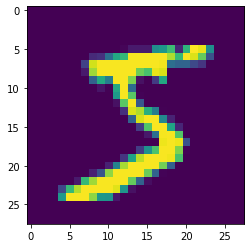

In [46]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

# 数据预览，训练数据集第一个数据
img0 = np.array(trainDataset[0][0]).transpose([1, 2, 0])
plt.imshow(img0*255)
print("类别")
print(trainDataset[0][1])

In [53]:
from torch.utils.data import dataloader

# 提取数据可供sklearn的SVM模型使用
train_loader = dataloader.DataLoader(dataset=trainDataset,batch_size=60000,shuffle=False)
for train_data in train_loader:
    (train_x, train_y) = train_data
print(train_x.shape)
test_loader = dataloader.DataLoader(dataset=testDataset,batch_size=10000,shuffle=False)
for test_data in test_loader:
    (test_x, test_y) = test_data
print(test_x.shape)

# 拉伸图片为一维向量
train_x = np.array(train_x.squeeze(1))
train_x = np.reshape(train_x, [60000, 784])
test_x = np.array(test_x.squeeze(1))
test_x = np.reshape(test_x, [10000, 784])
print(train_x.shape)
print(test_x.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])
(60000, 784)
(10000, 784)


In [54]:
from sklearn import svm

# 构建SVM模型，使用径向积核函数rbf，训练模型
model = svm.SVC( C=1.0, kernel='rbf', decision_function_shape='ovr')
model.fit(train_x, train_y)

SVC()

In [56]:
pre = model.predict(test_x)

In [59]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pre, digits=4))

              precision    recall  f1-score   support

           0     0.9799    0.9929    0.9863       980
           1     0.9886    0.9921    0.9903      1135
           2     0.9758    0.9748    0.9753      1032
           3     0.9745    0.9851    0.9798      1010
           4     0.9826    0.9786    0.9806       982
           5     0.9864    0.9765    0.9814       892
           6     0.9854    0.9854    0.9854       958
           7     0.9755    0.9689    0.9722      1028
           8     0.9714    0.9754    0.9734       974
           9     0.9719    0.9613    0.9666      1009

    accuracy                         0.9792     10000
   macro avg     0.9792    0.9791    0.9791     10000
weighted avg     0.9792    0.9792    0.9792     10000



### 分析
可以看到使用径向积核函数的SVM模型预测手写数字的平均精度为0.9792，平均召回率为0.9791，f1分数为0.9791，可见训练的SVM模型很好地完成了任务，效果比较不错

真实类别：5预测类别：6


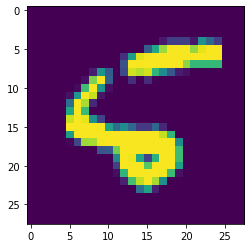

真实类别：7预测类别：4


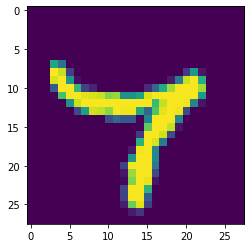

真实类别：2预测类别：9


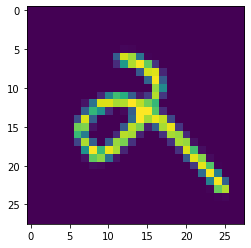

真实类别：9预测类别：8


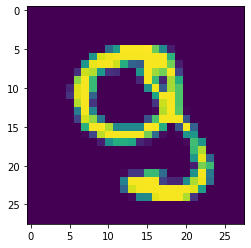

真实类别：9预测类别：8


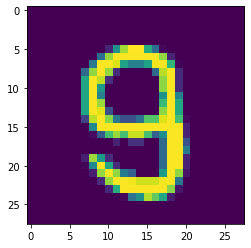

真实类别：4预测类别：2


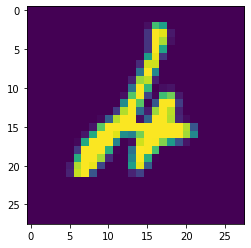

真实类别：6预测类别：0


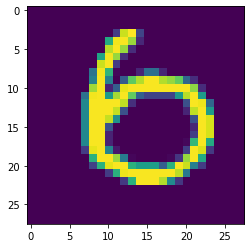

真实类别：2预测类别：7


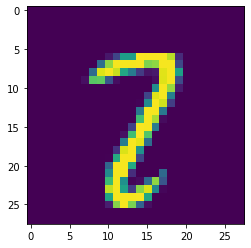

真实类别：5预测类别：3


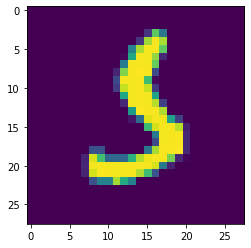

真实类别：3预测类别：7


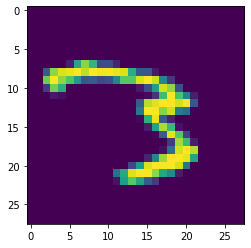

真实类别：6预测类别：0


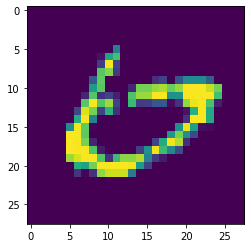

真实类别：4预测类别：9


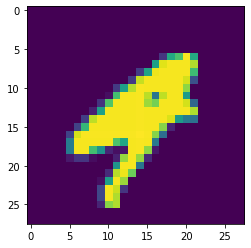

真实类别：9预测类别：8


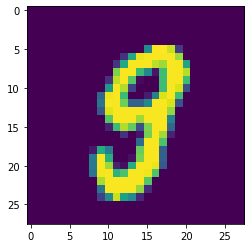

真实类别：8预测类别：2


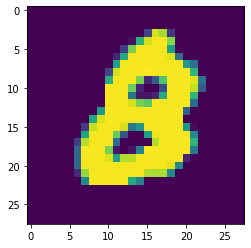

In [64]:
#前5000个测试样例中预测失败的样例展示
for i in range(500):
    if pre[i]!=test_y[i]:
        print("真实类别："+str(np.array(test_y[i]))+"预测类别："+str(pre[i]))
        img = test_x[i].reshape([28, 28])
        plt.imshow(img*255)
        plt.show()

### 分析
可以看到，大多数预测错误的样例本身写法就和预测类相近，甚至人眼也无法分辨属于哪一类，这进一步说明我们训练的SVM模型性能是比较不错的。

In [68]:
# 使用线性核函数SVM训练的结果
linear_model = svm.SVC( C=1.0, kernel='linear', decision_function_shape='ovr')
linear_model.fit(train_x, train_y)
linear_pre = linear_model.predict(test_x)
print(classification_report(test_y, linear_pre, digits=4))

              precision    recall  f1-score   support

           0     0.9522    0.9765    0.9642       980
           1     0.9697    0.9885    0.9791      1135
           2     0.9254    0.9370    0.9312      1032
           3     0.9062    0.9376    0.9217      1010
           4     0.9364    0.9593    0.9477       982
           5     0.9146    0.9002    0.9073       892
           6     0.9569    0.9499    0.9534       958
           7     0.9522    0.9309    0.9415      1028
           8     0.9370    0.9004    0.9183       974
           9     0.9486    0.9138    0.9308      1009

    accuracy                         0.9404     10000
   macro avg     0.9399    0.9394    0.9395     10000
weighted avg     0.9405    0.9404    0.9403     10000



In [69]:
# 使用多项式核函数SVM训练的结果
poly_model = svm.SVC( C=1.0, kernel='poly', decision_function_shape='ovr')
poly_model.fit(train_x, train_y)
poly_pre = poly_model.predict(test_x)
print(classification_report(test_y, poly_pre, digits=4))

              precision    recall  f1-score   support

           0     0.9828    0.9888    0.9858       980
           1     0.9741    0.9930    0.9834      1135
           2     0.9776    0.9748    0.9762      1032
           3     0.9811    0.9743    0.9776      1010
           4     0.9738    0.9837    0.9787       982
           5     0.9699    0.9742    0.9720       892
           6     0.9832    0.9781    0.9806       958
           7     0.9745    0.9679    0.9712      1028
           8     0.9794    0.9743    0.9768       974
           9     0.9748    0.9604    0.9675      1009

    accuracy                         0.9771     10000
   macro avg     0.9771    0.9769    0.9770     10000
weighted avg     0.9771    0.9771    0.9771     10000



### 分析
可见，分别使用线性核函数和多项式核函数的SVM性能没有使用径向积核函数的SVM好，各指标均有些许降低，可见径向积核函数对于MINIST数据集进行手写数字识别任务来说比较合适。